# Multivariate Linear Regression

## Machine Learning Excercise 1b

In [1]:
cd /Users/antngo/Desktop/AndrewNg/Andrew-Ng-Machine-Learning/wk1

/Users/antngo/Desktop/AndrewNg/Andrew-Ng-Machine-Learning/wk1


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
path = os.getcwd() + '/ex1data2.txt'
data = pd.read_csv(path, header = None, names = ['Size', 'Bedrooms','Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Feature Normalizaiton

Feature Scaling - adjusting the scales of features to level playing field. Subtracting from each value in a feature the mean of that feature, and dividing it by the standard deviation.

In [4]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [5]:
mu = np.mean(X, axis = 0)
sigma = np.std(X,axis = 0)

In [6]:
mu = np.array(mu.values)
sigma = np.array(sigma.values)


In [7]:
def featureNormalization(X):
    ## subtract mean from feature and divide by std of each feature
    X =(X-X.mean()) / X.std()
    return X

In [8]:
X = featureNormalization(X)
X.head()

,Size,Bedrooms
0,0.130010,-0.223675
1,-0.504190,-0.223675
2,0.502476,-0.223675
3,-0.735723,-1.537767
4,1.257476,1.090417


In [9]:
X = np.matrix(X.values)
X = np.insert(X,0,values=1,axis=1)
y = np.matrix(y.values)
theta = np.array([[0],[0],[0]])

## Cost Function
![img](img/costfunction.png)

In [10]:
def computeCost(X,y,theta):
    m = y.shape[0] #97
    J = (1/(2*m)) * np.sum(np.square(X.dot(theta)-y))
    return J
    #return (np.sum(np.square((X*theta.T)-y)) / (2*m))

## Gradient Descent
![img](img/gradientdescent.png)


In [11]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

In [12]:
alpha = .03
iters = 400
g, cost = gradientDescent(X, y, theta, alpha, iters)

In [13]:
g

matrix([[ 340410.91897274],
        [ 110308.11337059],
        [  -6326.5381075 ]])

Text(0.5,1,'Error vs. Training Epoch')

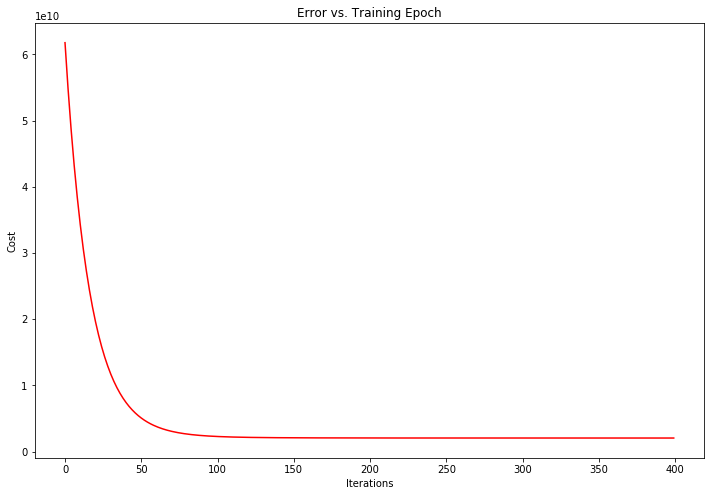

In [14]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

### Prediction

In [15]:
sample_X = np.array([1650., 3.])
# Normalise data
sample_X -= mu
sample_X /= sigma
sample_X

array([-0.44604386, -0.22609337])

In [16]:
sample_X = np.insert(sample_X,0,1.)
sample_X

array([ 1.        , -0.44604386, -0.22609337])

In [17]:
price = float(np.dot(g.T, sample_X))
print('Predicted price of a 1650 sq-ft, 3 br house is $%.0f.' % price)


Predicted price of a 1650 sq-ft, 3 br house is $292639.


### Selecting Learning Rates
Which learning rate converges more quickly.

With a small learning rate, gradient descent takes a long time to converge to optimal value.
With a large learning rate, gradient descent might not converge or even diverge.

In [18]:
iterations = 400
theta = np.array([[0],[0],[0]])
alphas = [0.3, 0.1, 0.03, 0.01, 0.003]
J_histories = []
for a in alphas:
    i = alphas.index(a)
    J_histories.append(gradientDescent(X,y,theta,a,iterations)[1])

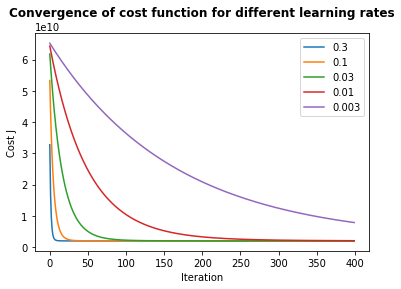

In [19]:
for i in range(len(J_histories)):
    plt.plot(J_histories[i])
plt.legend(alphas)
plt.title('Convergence of cost function for different learning rates', y = 1.05, weight='bold')
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.show()

In [20]:
path = os.getcwd() + '/ex1data2.txt'
data = pd.read_csv(path, header = None, names = ['Size', 'Bedrooms','Price'])
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X = np.matrix(X.values)
X = np.insert(X,0,values=1,axis=1)
y = np.matrix(y.values)
theta = np.array([[0],[0],[0]])

### Normal Equation
Performing minimization explicitly without resorting to iterative algorithm. 'Normal Equation' will minimize J by explicitly taking its derivatives with respect to the θj's and setting them to zero. 

There is NO need for feature scaling.

![img](img/normalequation.png)

In [21]:
def normalEqn(X,y):
    theta = np.zeros((np.shape(X)[1], 1))
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    
    return theta
    

In [22]:
theta = normalEqn(X,y)
theta

matrix([[ 89597.9095428 ],
        [   139.21067402],
        [ -8738.01911233]])

In [23]:
sample_X = np.array([1650., 3.])
sample_X = np.insert(sample_X, 0, 1)

In [24]:
price = float(np.dot(theta.T, sample_X))
print('Predicted price of a 1650 sq-ft, 3 br house is $%.0f.' % price)

Predicted price of a 1650 sq-ft, 3 br house is $293081.
